In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind
import statsmodels.api as sm

In [2]:
df = pd.read_csv("c:/Users\jehot\Desktop\통계/Regular_Season_Batter.csv")
df=df.filter(['SB','CS','BB','HBP','OPS'])
df=df.dropna()
df.describe()
#SB : 도루 / CS : 도루실패 / BB : 볼넷 / HBP : 사사구

,SB,CS,BB,HBP,OPS
count,2428.000000,2428.000000,2428.000000,2428.000000,2428.000000
mean,5.346787,2.359555,21.166804,3.461285,0.649939
std,9.120536,3.202615,21.208905,4.139380,0.261634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000,0.546000
50%,2.000000,1.000000,14.000000,2.000000,0.688637
75%,6.000000,3.000000,34.250000,5.000000,0.797234
max,84.000000,21.000000,108.000000,27.000000,4.000000


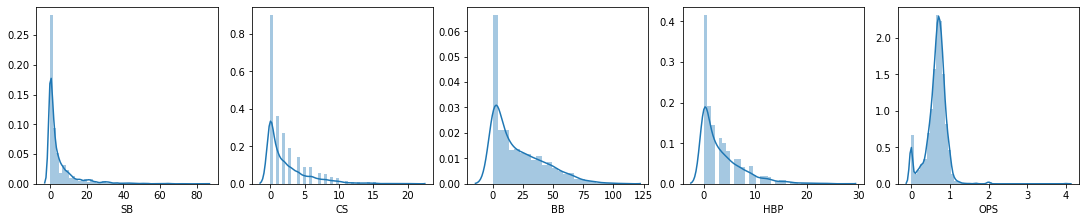

In [3]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(15, 3))
index = 0
axs = axs.flatten()

for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [4]:
# 변수 지정

x1 = df['SB']
x2 = df['CS']
x3 = df['BB']
x4 = df['HBP']
y = df['OPS']

In [5]:
#SB
#정규성 검정, P-value가 0.05 보다 커야 정규성 만족
#귀무가설 H0 : 모집단은 정규분포를 따른다
#대립가설 H1 : 모집단은 정규분포를 따르지 않는다

normal1=shapiro(x1)
normal2=shapiro(y)
print(normal1,normal2)

#등분산성 검정, P-value가 0.05보다 커야 등분산성 만족
#귀무가설 H0 : 등분산성이 있다
#대립가설 H1 : 등분산성이 없다

lresult = levene(x1, y)
print(lresult)

#독립 T-test 검정

print(ttest_ind(x1, y,equal_var = False))

(0.6208842992782593, 0.0) (0.8870577812194824, 6.39792241155246e-39)
LeveneResult(statistic=808.7860802901694, pvalue=1.098725823967591e-164)
Ttest_indResult(statistic=25.3648285396796, pvalue=3.9927190496466936e-126)


In [6]:
#CS

normal1=shapiro(x2)
normal2=shapiro(y)
print(normal1,normal2)

lresult = levene(x2, y)
print(lresult)

print(ttest_ind(x2, y,equal_var = False))

(0.7484216690063477, 0.0) (0.8870577812194824, 6.39792241155246e-39)
LeveneResult(statistic=1243.7675837591319, pvalue=9.082118711544064e-243)
Ttest_indResult(statistic=26.216454714371253, pvalue=8.42827489326158e-134)


In [7]:
#BB

normal1=shapiro(x3)
normal2=shapiro(y)
print(normal1,normal2)

lresult = levene(x3, y)
print(lresult)

print(ttest_ind(x3, y,equal_var = False))

(0.8764718770980835, 3.102530851953718e-40) (0.8870577812194824, 6.39792241155246e-39)
LeveneResult(statistic=3079.4494168907063, pvalue=0.0)
Ttest_indResult(statistic=47.66329442773698, pvalue=0.0)


In [8]:
#HBP

normal1=shapiro(x4)
normal2=shapiro(y)
print(normal1,normal2)

lresult = levene(x4, y)
print(lresult)

print(ttest_ind(x4, y, equal_var = False))

(0.8033740520477295, 0.0) (0.8870577812194824, 6.39792241155246e-39)
LeveneResult(statistic=1761.8867776318007, pvalue=0.0)
Ttest_indResult(statistic=33.39931518927212, pvalue=7.710006880916176e-202)


In [9]:
correlations = df.corr()['OPS'].sort_values()
print(correlations)

SB     0.240282
CS     0.283267
HBP    0.418250
BB     0.546328
OPS    1.000000
Name: OPS, dtype: float64


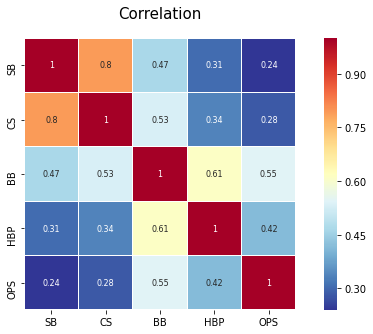

In [10]:
colormap = plt.cm.RdYlBu_r 
plt.figure(figsize=(10, 5)) 
plt.title("Correlation", y = 1.05, size = 15) 
sns.heatmap(df.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 8})

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

column_sels = ['SB','CS','BB','HBP','OPS']

dfX0 = df.loc[:,column_sels]
dfX = sm.add_constant(dfX0)
dfy = df['OPS']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
print(vif)

model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

   VIF Factor features
0    7.429911    const
1    2.743352       SB
2    2.988484       CS
3    2.318038       BB
4    1.630954      HBP
5    1.449313      OPS
                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.188e+31
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:06:00   Log-Likelihood:                 79911.
No. Observations:                2428   AIC:                        -1.598e+05
Df Residuals:                    2422   BIC:                        -1.598e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      